In [1]:
import matplotlib
#matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [4]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [5]:
columns_station = inspector.get_columns('stations')
for c in columns_station:
    print(c['name'], c["type"])

station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [7]:
session = Session(engine)

In [8]:
from sqlalchemy import desc
from datetime import datetime
from dateutil.relativedelta import relativedelta

cdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
current_date = datetime.strptime(str(cdate),'%Y-%m-%d')

twelve_months = current_date + relativedelta(months=-12)
measurement_12month = session.query(Measurement.date, Measurement.prcp). \
    filter(str(twelve_months)<=Measurement.date).filter(Measurement.date<=str(current_date)).order_by(Measurement.date).all()
measurement_12month  

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('

In [9]:
df = pd.DataFrame(measurement_12month, columns=['Date', 'Precipitation'])

#df['Date'] = pd.to_datetime(df['Date'])
#df['year_month'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))
#df.set_index('Date', inplace=True)
df.head(5)

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15


In [10]:
#prng = pd.period_range(twelve_months,current_date, freq='M')

#prng
tmp= np.arange(twelve_months, current_date, dtype='datetime64[M]')
tmp_list = [str(x) for x in tmp ]
tmp_list.append(str(cdate))
tmp_list


['2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08-23']

In [11]:
months = len(df['Precipitation'])
month_xticks = int((months / 13)*1.03)
plt.ylim = max(df['Precipitation']) + 1
tick_locations = [x+55 for x in range(0, months+1, month_xticks)]

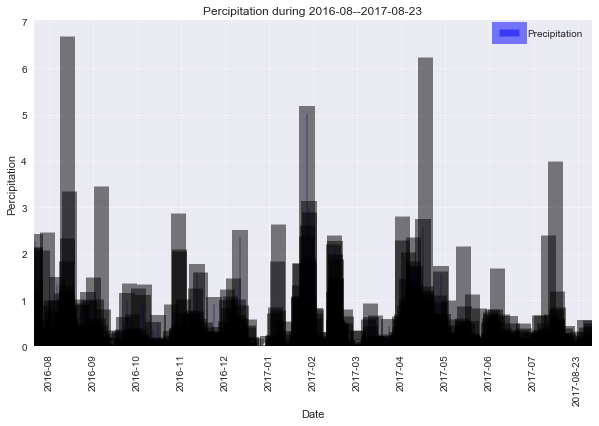

In [12]:


ax =df.plot(x='Date', y='Precipitation', kind='bar',alpha=0.5, linewidth =15, align="edge", facecolor = 'blue',edgecolor = 'blue',figsize=(10,6))

#x_axis = np.arange(0,len(tmp_list),1)
#tick_locations = [value+0.5 for value in x_axis]

plt.xticks(tick_locations,tmp_list )
plt.grid(linestyle='dotted')
plt.title(f"Percipitation during {tmp_list[0]}--{tmp_list[len(tmp_list)-1]}")

plt.ylabel("Percipitation")

plt.show()

In [13]:
#the summary statistics for the precipitation data

total_percipitation_by_date= df.groupby('Date')["Precipitation"].sum()
total_percipitation_by_date.head(20)

Date
2016-08-24    9.33
2016-08-25    0.54
2016-08-26    0.10
2016-08-27    0.32
2016-08-28    3.10
2016-08-29    1.46
2016-08-30    0.07
2016-08-31    3.18
2016-09-01    0.03
2016-09-02    0.25
2016-09-03    1.27
2016-09-04    1.38
2016-09-05    0.34
2016-09-06    1.23
2016-09-07    2.00
2016-09-08    0.46
2016-09-09    1.07
2016-09-10    1.40
2016-09-11    1.25
2016-09-12    1.54
Name: Precipitation, dtype: float64

In [14]:
#Station Analysis

total_station= session.query(func.count(Station.station)).all()
total_station

[(9)]

In [15]:
sel =[Measurement.station,func.count(Measurement.station)]
most_active_station = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station


('USC00519281', 2772)

In [16]:
sel =[Measurement.station, Station.name,func.sum(Measurement.tobs)]
obs_count_station = session.query(*sel). \
filter(Measurement.station == Station.station).\
group_by(Measurement.station).order_by(func.sum(Measurement.tobs).desc()).all()
obs_count_station


[('USC00519397', 'WAIKIKI 717.2, HI US', 200205),
 ('USC00519281', 'WAIHEE 837.5, HI US', 198652),
 ('USC00513117', 'KANEOHE 838.1, HI US', 195940),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 191698),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 176029),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 144913),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 138191),
 ('USC00517948', 'PEARL CITY, HI US', 50943),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 24855)]

In [17]:
highest_obs_station_name = obs_count_station[0][1]
highest_obs_station =obs_count_station[0][0]
print(f'the highest number of observations is: {highest_obs_station_name}')


the highest number of observations is: WAIKIKI 717.2, HI US


In [18]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs)

temperature_12months= session.query(Measurement.date, Measurement.tobs).\
    filter(str(twelve_months)<=Measurement.date).filter(Measurement.date<=str(current_date)).all()
temperature_12months

[('2016-08-24', 79),
 ('2016-08-25', 80),
 ('2016-08-26', 79),
 ('2016-08-27', 77),
 ('2016-08-28', 78),
 ('2016-08-29', 78),
 ('2016-08-30', 79),
 ('2016-08-31', 80),
 ('2016-09-01', 81),
 ('2016-09-02', 80),
 ('2016-09-03', 79),
 ('2016-09-04', 75),
 ('2016-09-07', 76),
 ('2016-09-08', 80),
 ('2016-09-09', 79),
 ('2016-09-10', 78),
 ('2016-09-11', 76),
 ('2016-09-12', 78),
 ('2016-09-13', 78),
 ('2016-09-14', 75),
 ('2016-09-15', 79),
 ('2016-09-16', 80),
 ('2016-09-17', 79),
 ('2016-09-18', 81),
 ('2016-09-19', 77),
 ('2016-09-20', 77),
 ('2016-09-21', 78),
 ('2016-09-22', 76),
 ('2016-09-23', 82),
 ('2016-09-24', 81),
 ('2016-09-25', 78),
 ('2016-09-26', 80),
 ('2016-09-27', 80),
 ('2016-09-28', 79),
 ('2016-09-29', 80),
 ('2016-09-30', 80),
 ('2016-10-01', 80),
 ('2016-10-02', 79),
 ('2016-10-03', 79),
 ('2016-10-04', 79),
 ('2016-10-05', 80),
 ('2016-10-06', 80),
 ('2016-10-07', 79),
 ('2016-10-08', 78),
 ('2016-10-09', 76),
 ('2016-10-10', 75),
 ('2016-10-11', 80),
 ('2016-10-12

In [19]:
#Filter by the station with the highest number of observations

temperature_12months_bystation= session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(str(twelve_months)<=Measurement.date).filter(Measurement.date<=str(current_date)).\
     filter(Measurement.station == highest_obs_station).\
    order_by(Measurement.date).all()
temperature_12months_bystation

[('USC00519397', '2016-08-24', 79),
 ('USC00519397', '2016-08-25', 80),
 ('USC00519397', '2016-08-26', 79),
 ('USC00519397', '2016-08-27', 77),
 ('USC00519397', '2016-08-28', 78),
 ('USC00519397', '2016-08-29', 78),
 ('USC00519397', '2016-08-30', 79),
 ('USC00519397', '2016-08-31', 80),
 ('USC00519397', '2016-09-01', 81),
 ('USC00519397', '2016-09-02', 80),
 ('USC00519397', '2016-09-03', 79),
 ('USC00519397', '2016-09-04', 75),
 ('USC00519397', '2016-09-07', 76),
 ('USC00519397', '2016-09-08', 80),
 ('USC00519397', '2016-09-09', 79),
 ('USC00519397', '2016-09-10', 78),
 ('USC00519397', '2016-09-11', 76),
 ('USC00519397', '2016-09-12', 78),
 ('USC00519397', '2016-09-13', 78),
 ('USC00519397', '2016-09-14', 75),
 ('USC00519397', '2016-09-15', 79),
 ('USC00519397', '2016-09-16', 80),
 ('USC00519397', '2016-09-17', 79),
 ('USC00519397', '2016-09-18', 81),
 ('USC00519397', '2016-09-19', 77),
 ('USC00519397', '2016-09-20', 77),
 ('USC00519397', '2016-09-21', 78),
 ('USC00519397', '2016-09-22

In [32]:
df_station = pd.DataFrame(temperature_12months_bystation, columns=['Station','Date', 'Temperature'])

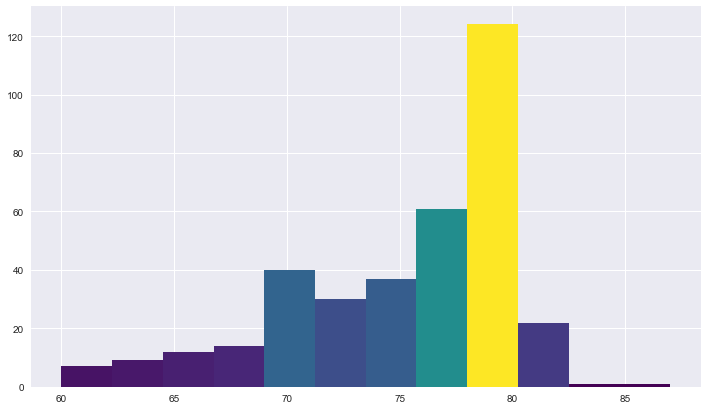

In [33]:
#Plot the results as a histogram with bins=12

from matplotlib import colors

fig, axs = plt.subplots(figsize=(12, 7))

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(df_station['Temperature'], bins=12)

# color code by height
fracs = N / N.max()

#normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.show()

In [22]:
def calc_temps(startdate, enddate):
    min_temperature = session.query(Measurement.date, Measurement.tobs).\
    filter(startdate<=Measurement.date).filter(Measurement.date<=enddate).\
    order_by(Measurement.tobs.asc()).first()
    
    average_temperature = session.query(func.avg(Measurement.tobs)).\
    filter(startdate<=Measurement.date).filter(Measurement.date<=enddate).all()
 
    max_temperature = session.query(Measurement.date, Measurement.tobs).\
    filter(startdate<=Measurement.date).filter(Measurement.date<=str(enddate)).\
    order_by(Measurement.tobs.desc()).first()
    
    return  min_temperature,average_temperature,max_temperature

In [23]:
start_date = '2016-10-11'
end_date = '2017-6-30'
minimum_temperature, average_temperature,max_temperature = calc_temps(start_date,end_date)
print(f'The minimum temperature during {start_date} to {end_date} is {minimum_temperature}')
print(f'The average temperature during {start_date} to {end_date} is {average_temperature[0][0]}')
print(f'The maximum temperature during {start_date} to {end_date} is {max_temperature}')     


The minimum temperature during 2016-10-11 to 2017-6-30 is ('2017-04-30', 58)
The average temperature during 2016-10-11 to 2017-6-30 is 73.97466896948762
The maximum temperature during 2016-10-11 to 2017-6-30 is ('2017-05-23', 87)


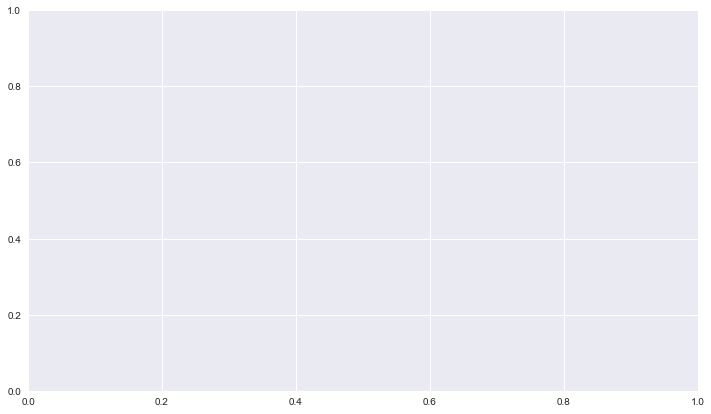

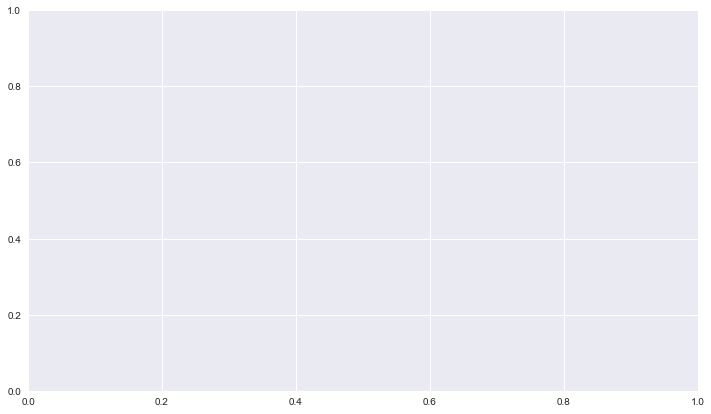

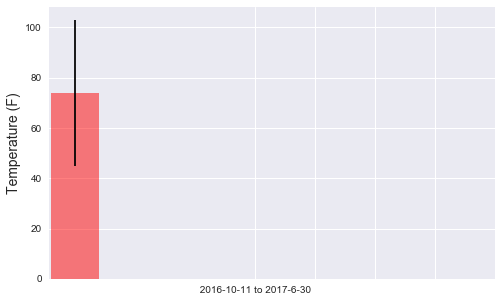

In [24]:
#Plot the min, avg, and max temperature from your previous query as a bar chart
fig, ax = plt.subplots(figsize=(8, 5))

y = average_temperature[0][0]
x=' 2016-10-11 to 2017-6-30 '
yerr_value = int(max_temperature[1]) -int(minimum_temperature[1])

plt.bar(x, y, color='r', alpha=0.5, align="center", width = 0.8,yerr=yerr_value)
plt.xticks(np.arange(3, 8, 1.0))
plt.title("")
plt.ylabel("Temperature (F)", fontsize=14)


plt.show()

In [25]:
#Calcualte the rainfall per weather station using the previous year's matching dates.

rainfall_tmp = session.query(Measurement.station, Measurement.prcp). \
    filter(twelve_months<=Measurement.date).filter(Measurement.date<=current_date).all()

df_rainfall = pd.DataFrame(rainfall_tmp, columns=['Station','Percipitation'])
df_rainfall= df_rainfall.groupby('Station').sum()
df_rainfall = df_rainfall.rename(columns={'Percipitation' : 'Total Percipitation'})
df_rainfall.head()

,Total Percipitation
Station,
USC00513117,48.36
USC00514830,33.19
USC00516128,147.11
USC00517948,4.59
USC00519281,68.24


In [26]:
#Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

temperature_date = session.query(Measurement.date, Measurement.tobs). \
                    order_by(Measurement.date).all()
daily_temperature = pd.DataFrame(temperature_date, columns=['Date', 'Temperature'])
daily_temp_grp = daily_temperature.groupby('Date').agg(['max','mean','min'])
daily_temp_grp['Daily Temperature Max']=daily_temp_grp['Temperature']['max']
daily_temp_grp['Daily Temperature Min']=daily_temp_grp['Temperature']['min']
daily_temp_grp['Daily Temperature Average']=daily_temp_grp['Temperature']['mean']
daily_temp_grp=daily_temp_grp.drop(['Temperature'], axis = 1)
daily_temp_grp['Daily Normal'] =(daily_temp_grp['Daily Temperature Max']+daily_temp_grp['Daily Temperature Min']+ \
                                daily_temp_grp['Daily Temperature Average'])/3

daily_temp_grp.head()

,Daily Temperature Max,Daily Temperature Min,Daily Temperature Average,Daily Normal
,,,,
Date,,,,
2010-01-01,75,65,69.714286,69.904762
2010-01-02,75,61,67.000000,67.666667
2010-01-03,77,67,74.000000,72.666667
2010-01-04,76,72,75.000000,74.333333
2010-01-05,76,73,74.500000,74.500000


In [27]:
def daily_normals(in_date):
        
    temperature_date = session.query(Measurement.date, Measurement.tobs). \
               filter(func.strftime("%m-%d", Measurement.date) == in_date).\
                    order_by(Measurement.date).all()
    daily_temperature = pd.DataFrame(temperature_date, columns=['Date', 'Temperature'])
    daily_temp_max= daily_temperature['Temperature'].max()
    daily_temp_min=daily_temperature['Temperature'].min()
    daily_temp_average=daily_temperature['Temperature'].mean()
    daily_normal =(daily_temp_max+daily_temp_min+ daily_temp_average)/3
    
    return daily_normal

In [28]:
query_date = '05-16'
daily_normal = daily_normals(query_date)
print(f'The daily normals on {query_date} is: {daily_normal}')

The daily normals on 05-16 is: 74.08928571428571


In [39]:
#Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each 
#date string and append the results to a list.
import datetime

trip_start = '03-01'
trip_end = '03-15'

daily_normal_list = []
trip_days=[]

start = datetime.datetime.strptime(trip_start, '%m-%d')
end = datetime.datetime.strptime(trip_end, '%m-%d')
step = datetime.timedelta(days=1)
while start <= end:
        tmp_date = start.strftime('%m-%d')
        trip_days.append(tmp_date)
        start += step

for day in trip_days:
    daily_normal_list.append(daily_normals(day))
daily_normal_list

normal_dict = {'Date':trip_days,
              'Daily Normals':daily_normal_list}
pd_daily_normals = pd.DataFrame.from_dict(normal_dict)
#pd_daily_normals=pd_daily_normals.set_index('Date')
pd_daily_normals

,Daily Normals,Date
0,69.994048,03-01
1,69.395062,03-02
2,69.395062,03-03
3,67.735849,03-04
4,68.019608,03-05
5,68.352201,03-06
6,69.032051,03-07
7,68.500000,03-08
8,66.830189,03-09
9,66.962264,03-10


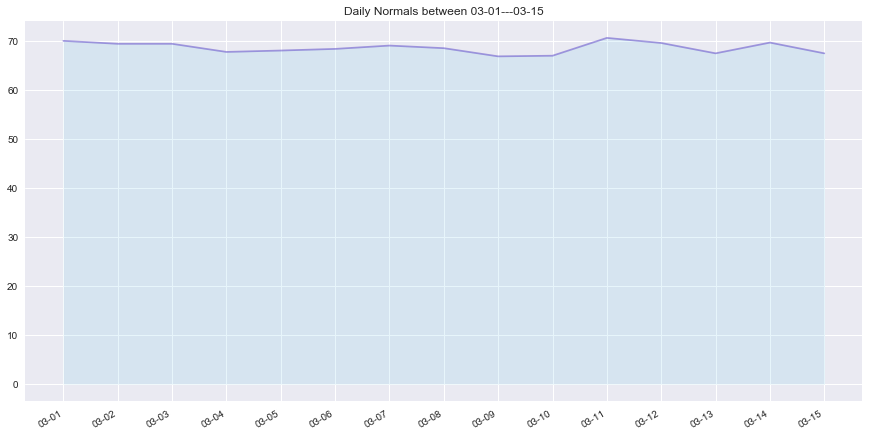

In [41]:
# Plot an area plot (stacked=False) for the daily normals

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15, 7))
days = len(daily_normal_list)


plt.fill_between(pd_daily_normals['Date'], pd_daily_normals['Daily Normals'],color="skyblue", alpha=0.2)
plt.plot(pd_daily_normals['Date'], pd_daily_normals['Daily Normals'], color="Slateblue", alpha=0.6)

ax.get_xaxis().set_minor_locator(ticker.AutoMinorLocator())

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.title(f'Daily Normals between {trip_start}---{trip_end}')
plt.show()
 
